In [2]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pylab as plt
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [71]:
df = pd.read_csv(r'D:\0_sea_ice_challenge\processing\DRIFT_DATA_TRAIN.csv')
print(df.columns)
df_training = df[:]

Index(['year', 'month', 'day', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy',
       'id_buoy', 'u_ERA5', 'v_ERA5', 'sic_CDR', 'h_cs2smos', 'h_piomas',
       'd2c'],
      dtype='object')


In [72]:
var=df.copy()
var.head()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c
0,1979,2,18,49,147.506958,138.582672,-0.797554,1.114740,1906,-6.704156,-0.321260,0.990195,NaN,3.189743,522.523298
1,1979,2,18,49,146.834778,120.509880,0.643200,0.368754,1913,-6.818630,-0.674205,0.966372,NaN,2.484009,412.767669
2,1979,2,18,49,130.993561,129.623672,-1.162420,0.243717,1914,-8.825469,1.123955,0.996022,NaN,2.474106,362.547379
3,1979,2,18,49,147.524719,157.382492,0.919766,0.025784,1918,-1.079951,-1.035410,0.982681,NaN,3.740522,381.025629
4,1979,2,19,50,147.470963,138.599823,0.380940,1.243485,1906,-2.169171,2.537787,0.990302,NaN,3.188522,521.535334


In [73]:
var.dtypes

year           int64
month          int64
day            int64
doy            int64
x_EASE       float64
y_EASE       float64
u_buoy       float64
v_buoy       float64
id_buoy        int64
u_ERA5       float64
v_ERA5       float64
sic_CDR      float64
h_cs2smos    float64
h_piomas     float64
d2c          float64
dtype: object

In [74]:
var = var.sort_values(['year', 'month', 'day'], ascending=[True,True, True])

In [75]:
var.shape

(339478, 15)

In [76]:
var.drop_duplicates(keep='last',inplace=True) 
var.reset_index(drop=True, inplace=True)
print(var.shape)

(339203, 15)


In [77]:
a=pd.to_datetime(var[['year', 'month', 'day']])
a

0        1979-02-18
1        1979-02-18
2        1979-02-18
3        1979-02-18
4        1979-02-19
            ...    
339198   2019-12-30
339199   2019-12-30
339200   2019-12-30
339201   2019-12-30
339202   2019-12-30
Length: 339203, dtype: datetime64[ns]

In [78]:
b = a.copy()
b=list(b)
c=[b[0]]
d=c+b
d.pop()
e = (np.array(b)-np.array(d))
f=[]
for i in e:
    f.append(i.days)
    
var['f']=f
var['day_no']=var['f'].cumsum()
var.drop('f', axis=1, inplace=True)
var.head()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c,day_no
0,1979,2,18,49,147.506958,138.582672,-0.797554,1.114740,1906,-6.704156,-0.321260,0.990195,NaN,3.189743,522.523298,0
1,1979,2,18,49,146.834778,120.509880,0.643200,0.368754,1913,-6.818630,-0.674205,0.966372,NaN,2.484009,412.767669,0
2,1979,2,18,49,130.993561,129.623672,-1.162420,0.243717,1914,-8.825469,1.123955,0.996022,NaN,2.474106,362.547379,0
3,1979,2,18,49,147.524719,157.382492,0.919766,0.025784,1918,-1.079951,-1.035410,0.982681,NaN,3.740522,381.025629,0
4,1979,2,19,50,147.470963,138.599823,0.380940,1.243485,1906,-2.169171,2.537787,0.990302,NaN,3.188522,521.535334,1


In [79]:
var.tail()

,year,month,day,doy,x_EASE,y_EASE,u_buoy,v_buoy,id_buoy,u_ERA5,v_ERA5,sic_CDR,h_cs2smos,h_piomas,d2c,day_no
339198,2019,12,30,364,193.232056,172.742004,-0.981225,-11.69840,44880,-2.526544,-6.012877,1.000000,1.414148,1.620020,702.312813,14925
339199,2019,12,30,364,208.421234,142.049896,-7.247925,-5.28989,53005,-4.615093,-0.381765,1.000000,1.039972,1.288953,360.491321,14925
339200,2019,12,30,364,145.264023,146.109741,-0.913761,2.18215,95020,1.940967,1.119087,1.000000,2.059716,1.960349,393.799208,14925
339201,2019,12,30,364,193.921402,174.408707,-0.101372,-11.79170,7750,-2.468425,-5.363596,1.000000,1.411272,1.610893,680.057567,14925
339202,2019,12,30,364,100.407974,159.768845,0.000000,-0.00000,16461,1.372457,7.310530,0.949975,1.221326,1.339197,11.722729,14925


In [80]:
var.shape

(339203, 16)

In [81]:
var.columns

Index(['year', 'month', 'day', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy',
       'id_buoy', 'u_ERA5', 'v_ERA5', 'sic_CDR', 'h_cs2smos', 'h_piomas',
       'd2c', 'day_no'],
      dtype='object')

In [82]:
var.drop(['day','id_buoy','h_cs2smos'], axis=1, inplace=True)

In [83]:
var['val_mag'] = np.sqrt(var['u_buoy']**2 + var['v_buoy']**2 )
var['wind_val_mag'] = np.sqrt(var['u_ERA5']**2 + var['v_ERA5']**2 )
var['val_dir'] = np.where(var['v_buoy']!= 0, np.degrees(np.arctan(var['v_buoy']/var['u_buoy'])), 0)
var['wind_val_dir'] = np.where(var['v_ERA5']!= 0, np.degrees(np.arctan(var['v_ERA5']/var['u_ERA5'])), 0)

In [84]:
var.tail()

,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,u_ERA5,v_ERA5,sic_CDR,h_piomas,d2c,day_no,val_mag,wind_val_mag,val_dir,wind_val_dir
339198,2019,12,364,193.232056,172.742004,-0.981225,-11.69840,-2.526544,-6.012877,1.000000,1.620020,702.312813,14925,11.739478,6.522125,85.205433,67.208396
339199,2019,12,364,208.421234,142.049896,-7.247925,-5.28989,-4.615093,-0.381765,1.000000,1.288953,360.491321,14925,8.973035,4.630856,36.123795,4.728801
339200,2019,12,364,145.264023,146.109741,-0.913761,2.18215,1.940967,1.119087,1.000000,1.960349,393.799208,14925,2.365742,2.240471,-67.278820,29.966106
339201,2019,12,364,193.921402,174.408707,-0.101372,-11.79170,-2.468425,-5.363596,1.000000,1.610893,680.057567,14925,11.792136,5.904344,89.507446,65.287246
339202,2019,12,364,100.407974,159.768845,0.000000,-0.00000,1.372457,7.310530,0.949975,1.339197,11.722729,14925,0.000000,7.438245,0.000000,79.367225


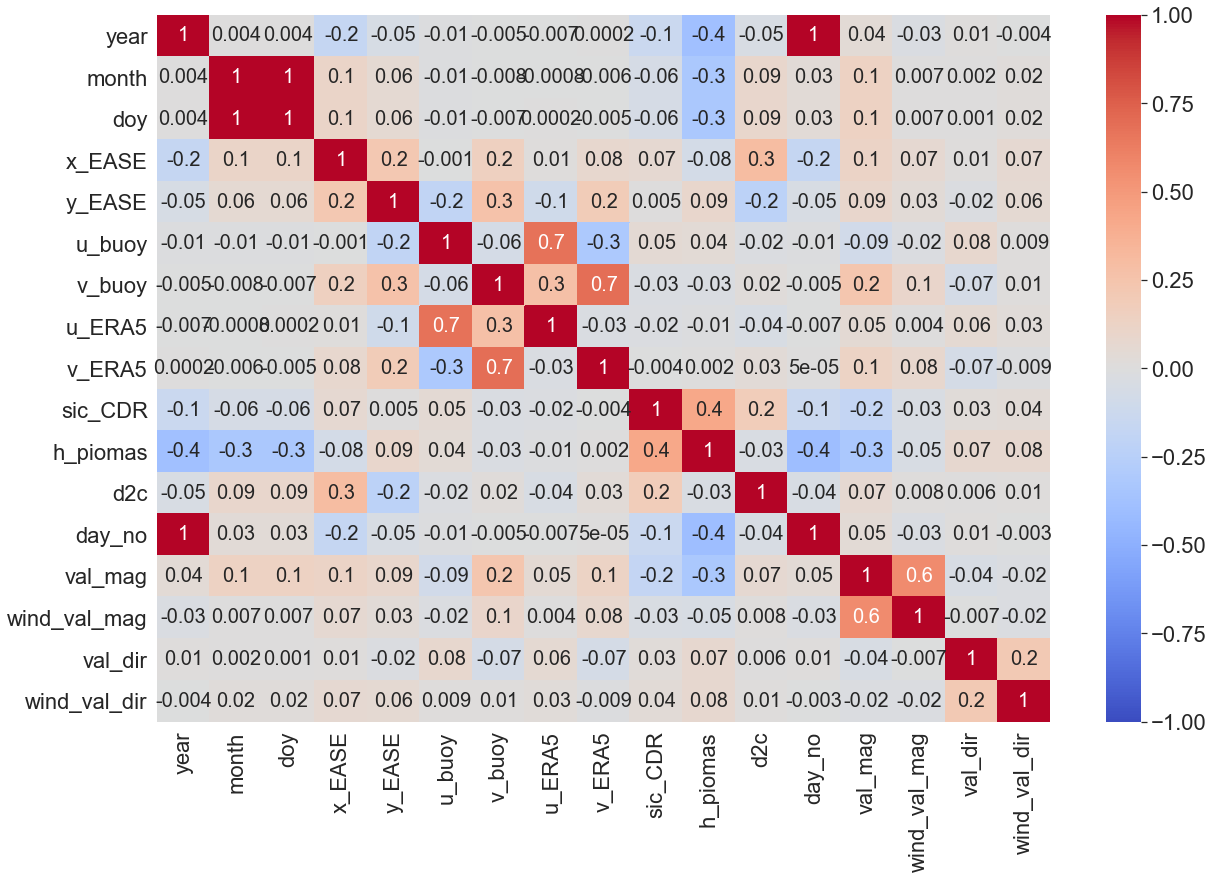

In [85]:
fig, ax = plt.subplots(figsize=(20,13))   
sns.set(font_scale=2)
sns.heatmap(var.corr(), ax=ax, annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',annot_kws={"size": 20})

In [86]:
def quadrant(row):
    if row['u_buoy'] >0 and  row['v_buoy'] >0:
        val = 1
    elif row['u_buoy'] <0 and  row['v_buoy'] >0:
        val = 2
    elif row['u_buoy'] <0 and  row['v_buoy'] <0:
        val = 3
    elif row['u_buoy'] >0 and  row['v_buoy'] <0:
        val = 4
    else:
        val = -1
    return val

In [87]:
var['ice_quadrant'] = var.apply(quadrant, axis=1)

In [88]:
def cor_direction(row):
    if row['ice_quadrant'] == 1:
        val = row['val_dir'] 
    elif row['ice_quadrant'] == 2:
        val = row['val_dir'] + 180
    elif row['ice_quadrant'] == 3:
        val = row['val_dir'] + 180
    elif row['ice_quadrant'] == 4:
        val = row['val_dir'] + 360
    else:
        val = row['val_dir'] 
    return val

In [89]:
var['vel_dir'] = var.apply(cor_direction, axis=1)
var.drop('val_dir', axis=1, inplace=True)

In [90]:
def wind_quadrant(row):
    if row['u_ERA5'] >0 and  row['v_ERA5'] >0:
        val = 1
    elif row['u_ERA5'] <0 and  row['v_ERA5'] >0:
        val = 2
    elif row['u_ERA5'] <0 and  row['v_ERA5'] <0:
        val = 3
    elif row['u_ERA5'] >0 and  row['v_ERA5'] <0:
        val = 4
    else:
        val = -1
    return val

In [91]:
var['wind_quadrant'] = var.apply(wind_quadrant, axis=1)

In [92]:
def cor_direction2(row):
    if row['wind_quadrant'] == 1:
        val = row['wind_val_dir'] 
    elif row['wind_quadrant'] == 2:
        val = row['wind_val_dir'] + 180
    elif row['wind_quadrant'] == 3:
        val = row['wind_val_dir'] + 180
    elif row['wind_quadrant'] == 4:
        val = row['wind_val_dir'] + 360
    else:
        val = row['wind_val_dir'] 
    return val

In [93]:
var['wind_dir'] = var.apply(cor_direction2, axis=1)
var.drop('wind_val_dir', axis=1, inplace=True)

In [94]:
var.columns

Index(['year', 'month', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy',
       'u_ERA5', 'v_ERA5', 'sic_CDR', 'h_piomas', 'd2c', 'day_no', 'val_mag',
       'wind_val_mag', 'ice_quadrant', 'vel_dir', 'wind_quadrant', 'wind_dir'],
      dtype='object')

In [95]:
len(var.columns)

19

In [96]:
var = var[['day_no','year', 'month', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy', 'val_mag', 'vel_dir', 'ice_quadrant', 'u_ERA5', 'v_ERA5',
         'wind_val_mag','wind_quadrant','wind_dir','sic_CDR', 'h_piomas', 'd2c']]

In [97]:
len(var.columns)

19

In [98]:
var.loc[var.vel_dir == -90, 'vel_dir'] = 270

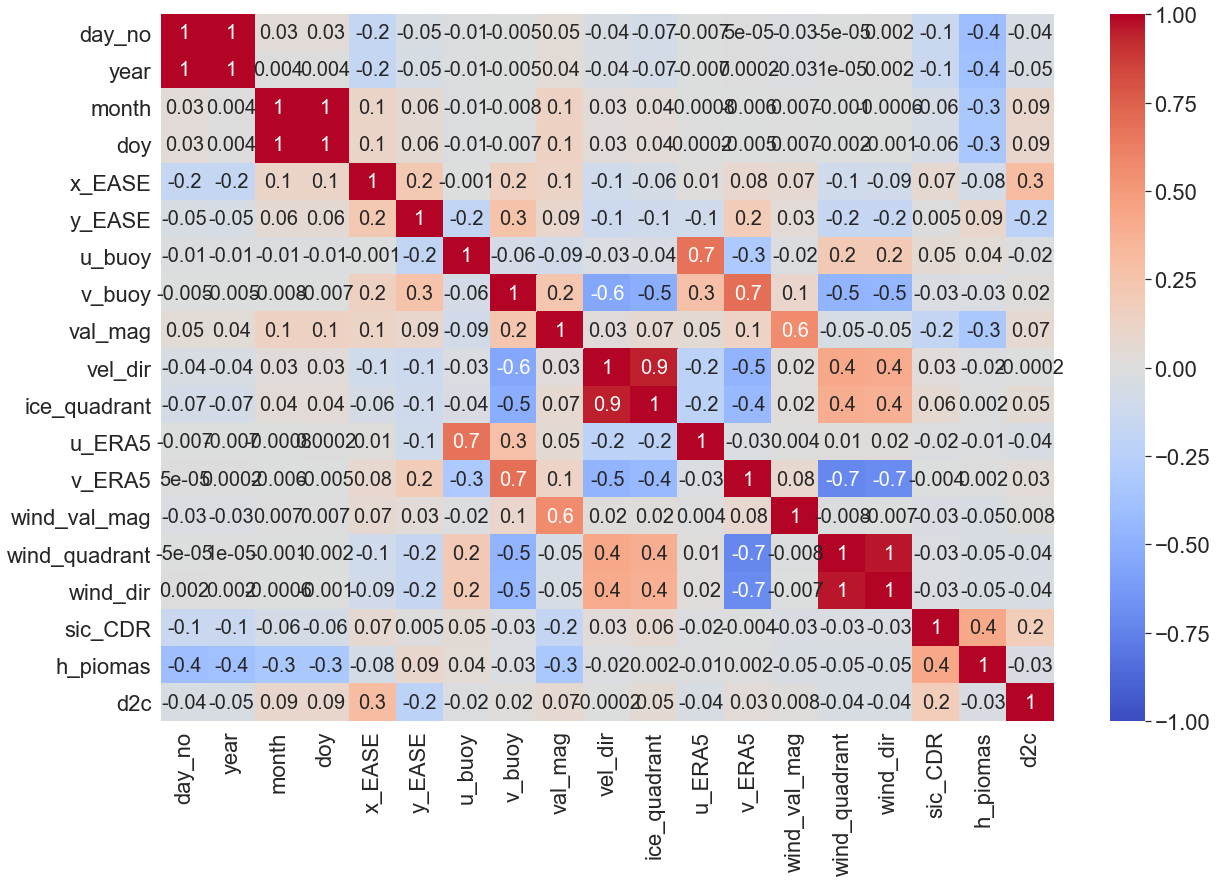

In [99]:
fig, ax = plt.subplots(figsize=(20,13))   
sns.set(font_scale=2)
sns.heatmap(var.corr(), ax=ax, annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm',annot_kws={"size": 20})

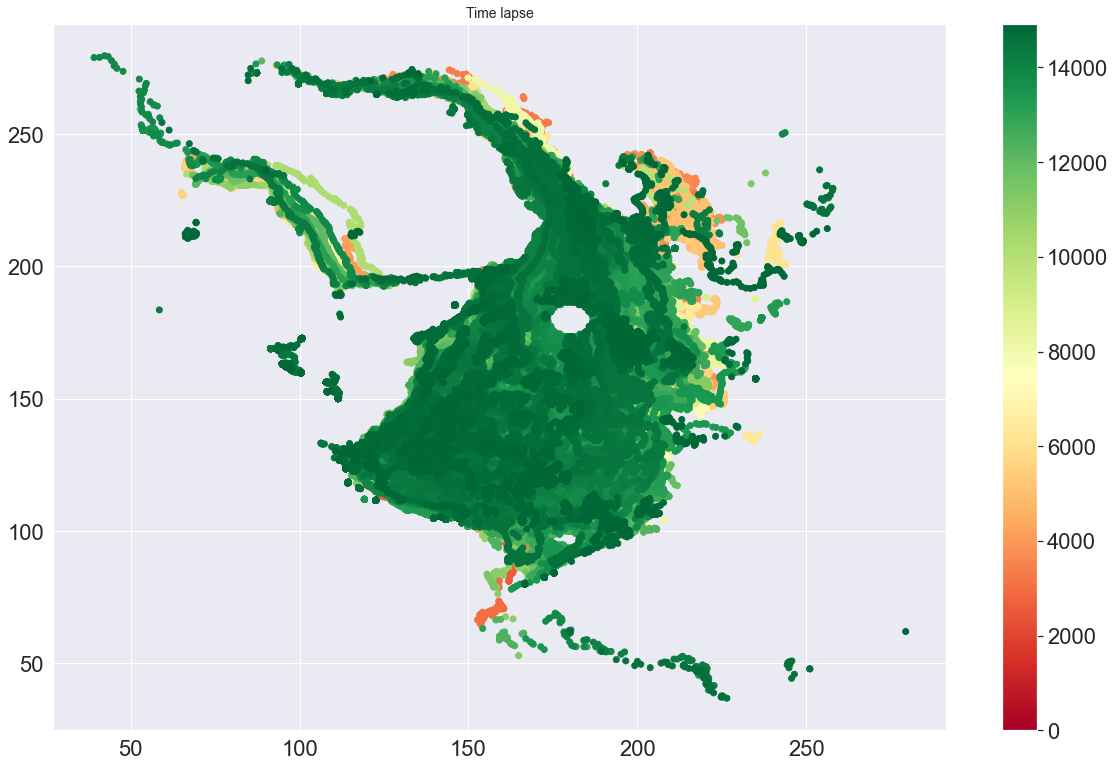

In [31]:
fig, ax = plt.subplots(figsize=(20,13))  
ax.set_title('Time lapse',
               fontsize=14)
sctr = ax.scatter(x=var['x_EASE'], y=var['y_EASE'], c=var['day_no'], cmap='RdYlGn')
plt.colorbar(sctr, ax=ax, format='%d')

plt.show()

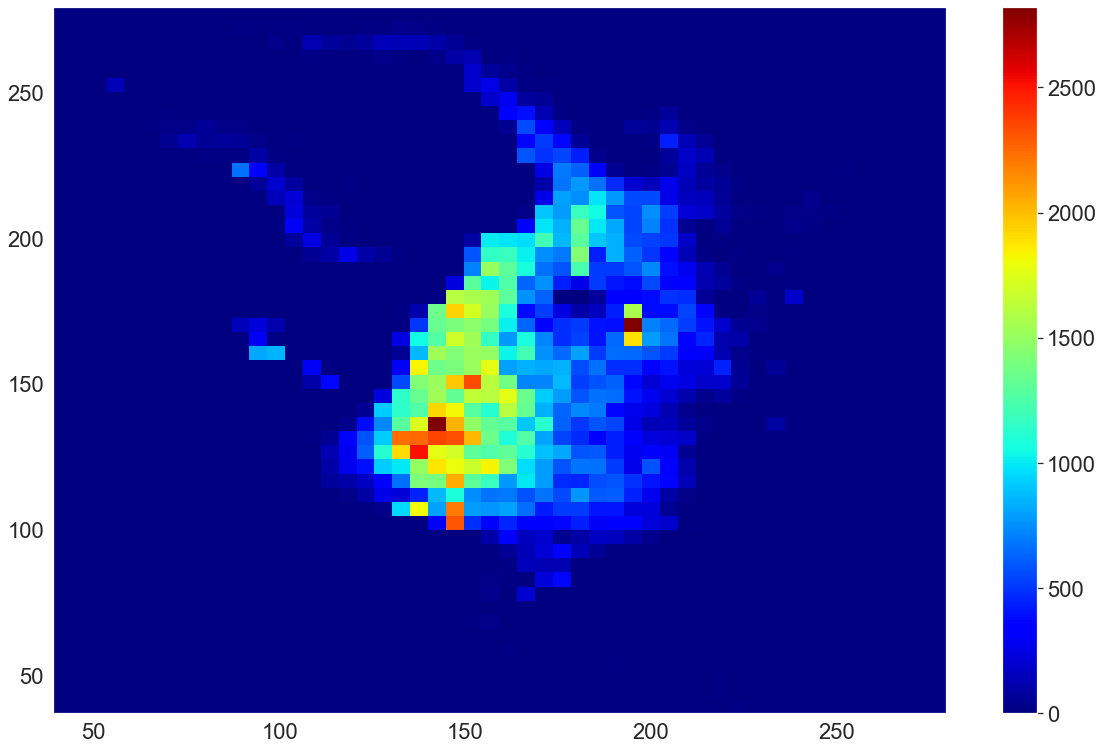

In [49]:
x = var['x_EASE']
y = var['y_EASE']
fig, ax = plt.subplots(figsize=(20,13))
plt.hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.grid(True)
plt.show()
 

In [35]:
var.columns

Index(['day_no', 'doy', 'x_EASE', 'y_EASE', 'u_buoy', 'v_buoy', 'val_mag',
       'vel_dir', 'ice_quadrant', 'u_ERA5', 'v_ERA5', 'wind_val_mag',
       'wind_quadrant', 'wind_dir', 'sic_CDR', 'h_piomas', 'd2c'],
      dtype='object')

In [163]:
var.shape

(339203, 16)

In [33]:
max_x = max(var['x_EASE'])
min_x = min(var['x_EASE'])
max_y = max(var['y_EASE'])
min_y = min(var['y_EASE'])

print("maximum x coordinate" ,  max(var['x_EASE']))
print("minimum x coordinate" ,  min(var['x_EASE']))
print("maximum y coordinate" ,  max(var['y_EASE']))
print("minimum y coordinate" ,  min(var['y_EASE']))
print("maximum valocity magnitude" ,  max(var['val_mag']))

maximum x coordinate 279.39154052734403
minimum x coordinate 39.168983459472706
maximum y coordinate 279.56207275390597
minimum y coordinate 36.870292663574205
maximum valocity magnitude 75.60970444552193


In [37]:
def animated2(a):
    #x = h['date'][a:b]
    #y = h[["RF", "mean","1.25", "0.75"]][a:b]
    fig, ax = plt.subplots(figsize=(15,12))  
    ax.set_title('Change in absolute Velocity with time across ease grid',
                   fontsize=14)
    sctr = ax.scatter(x=var['x_EASE'][a:a+250], y=var['y_EASE'][a:a+250], c=var['val_mag'][a:a+250], cmap='RdYlGn')
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    sctr.set_clim(vmin=0, vmax=76)
    plt.colorbar(sctr, ax=ax, format='%d')
    
    plt.show()
interact(animated2, a=(0,339200,250))

interactive(children=(IntSlider(value=169500, description='a', max=339200, step=250), Output()), _dom_classes=…

<function __main__.animated2(a)>

In [38]:
def animated2(a):
    #x = h['date'][a:b]
    #y = h[["RF", "mean","1.25", "0.75"]][a:b]
    fig, ax = plt.subplots(figsize=(15,12))  
    ax.set_title('Change in absolute Velocity with time across ease grid',
                   fontsize=14)
    sctr = ax.scatter(x=var['x_EASE'][a:a+250], y=var['y_EASE'][a:a+250], c=var['val_mag'][a:a+250], cmap='RdYlGn')
    plt.xlim(min_x, max_x)
    plt.ylim(min_y, max_y)
    sctr.set_clim(vmin=0, vmax=20)
    plt.colorbar(sctr, ax=ax, format='%d')
    
    plt.show()
interact(animated2, a=(0,339200,250))

interactive(children=(IntSlider(value=169500, description='a', max=339200, step=250), Output()), _dom_classes=…

<function __main__.animated2(a)>

In [64]:
var[(var['x_EASE']<145) & (var['x_EASE']>140) & (var['y_EASE']<135) & (var['y_EASE']>130)].shape[0]

2561

In [106]:
var[(var['x_EASE']<142) & (var['x_EASE']>140) & (var['y_EASE']<132) & (var['y_EASE']>130)].shape[0]

358

In [117]:
trend_df = var[(var['x_EASE']<145) & (var['x_EASE']>140) & (var['y_EASE']<135) & (var['y_EASE']>130)]

In [118]:
trend_df.reset_index(drop=True, inplace=True)

In [119]:
trend_df.head()

,day_no,year,month,doy,x_EASE,y_EASE,u_buoy,v_buoy,val_mag,vel_dir,ice_quadrant,u_ERA5,v_ERA5,wind_val_mag,wind_quadrant,wind_dir,sic_CDR,h_piomas,d2c
0,146,1979,7,195,144.885345,133.249466,-4.232370,4.313965,6.043447,134.452993,2,-0.826618,6.076796,6.132760,2,97.746316,0.996346,3.109291,560.219768
1,147,1979,7,196,144.739532,133.398178,-9.082155,1.552194,9.213840,170.301512,2,-1.459352,5.564088,5.752285,2,104.696540,0.952213,3.082505,555.019317
2,148,1979,7,197,144.426392,133.451721,-2.837179,0.568495,2.893575,168.669504,2,-2.942310,3.042936,4.232806,2,134.036820,0.922419,3.058261,548.843276
3,150,1979,7,199,144.251663,133.535995,-0.466594,-1.169310,1.258966,248.246334,3,-1.560758,1.489883,2.157711,2,136.330907,0.943199,3.098521,544.388045
4,151,1979,7,200,144.235596,133.495804,0.192854,-0.068347,0.204607,340.485926,4,1.706411,-2.489829,3.018458,4,304.424894,0.952680,3.047797,544.885697


In [120]:
trend_df['day_no'].unique()

array([  146,   147,   148, ..., 14923, 14924, 14925], dtype=int64)

In [121]:
trend_df.shape

(2561, 19)

In [122]:
trend_df = trend_df.sort_values('day_no', ascending=True)

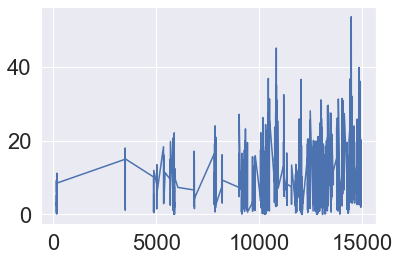

In [123]:
plt.plot(trend_df['day_no'], trend_df['val_mag'], label="val_mag")

plt.show()